,Losses,SquadMarketValue
0,3,3.045915e+09
1,7,4.210300e+09
2,6,3.483677e+09
3,10,4.609046e+09
4,10,2.958820e+09
5,11,4.707037e+09
6,8,2.585098e+09
7,10,2.099467e+09
8,15,2.412904e+09
9,12,3.207902e+09


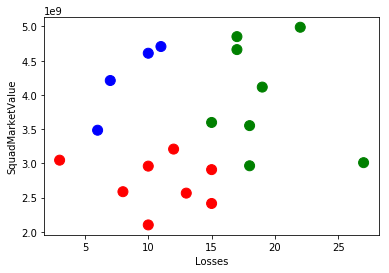

In [35]:

import requests
import random
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.vq import whiten, kmeans2

def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json
    except:
        print(json)
        return None

teams = call_api('http://api.football-data.org/v1/soccerseasons/398/teams', 'teams')
leagueTable = call_api('http://api.football-data.org/v1/competitions/398/leagueTable', 'leagueTable')

squadMarketValue_list = []
for team in teams['teams']:
    if team['squadMarketValue'] == None:
        squadMarketValue = round(random.uniform(2000000000, 5000000000), 0)
    else:
        squadMarketValue = team['squadMarketValue']
    squadMarketValue_list.append(squadMarketValue)

losses_list = []    
for team in leagueTable['standing']:
    losses_list.append(team['losses'])

team_for_pd = []
i = 0
while i < len(teamName_list):
    team_for_pd.append({'SquadMarketValue': squadMarketValue_list[i],
                        'Losses': losses_list[i]})
    i += 1

teams_pd = pd.DataFrame(team_for_pd)

whitened = whiten(teams_pd.as_matrix())
# три кластера
centroids, cluster_map = kmeans2(whitened, 3)

colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

teams_pd.plot.scatter(x='Losses', y='SquadMarketValue', c=colors, s=100)
teams_pd

,Losses,SquadMarketValue
0,3,3.339363e+09
1,7,4.190204e+09
2,6,4.090250e+09
3,10,3.915799e+09
4,10,2.456505e+09
5,11,4.941770e+09
6,8,3.059375e+09
7,10,2.298095e+09
8,15,4.890726e+09
9,12,4.306442e+09


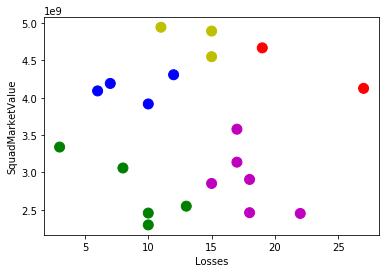

In [32]:
# пять кластеров
centroids, cluster_map = kmeans2(whitened, 5)

colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

teams_pd.plot.scatter(x='Losses', y='SquadMarketValue', c=colors, s=100)
teams_pd